In [1]:
import os 
import numpy as np
import pandas as pd
import anndata
import scanpy as sc
import matplotlib.pyplot as plt
import scgen
import seaborn as sns
from scipy import stats
import scipy.sparse as sparse
import matplotlib
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.set_figure_params(dpi_save=300)

2025-12-31 00:23:07.266616: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767140587.278387   49725 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767140587.282445   49725 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767140587.292088   49725 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767140587.292098   49725 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767140587.292101   49725 computation_placer.cc:177] computation placer alr

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
path_to_save = "../results/Figures/Figure 4/"
os.makedirs(path_to_save, exist_ok=True)
sc.settings.figdir = path_to_save

In [3]:
train =  sc.read("../data/train_study.h5ad")
if sparse.issparse(train.X):
    train.X = train.X.toarray()
fmono_ctrl_train = train[(train.obs["cell_type"] == "FCGR3A+ Monocytes") & (train.obs["condition"] == "control")]
fmono_stim_train = train[(train.obs["cell_type"] == "FCGR3A+ Monocytes") & (train.obs["condition"] == "stimulated")]
print(fmono_ctrl_train.shape, fmono_stim_train.shape)

(987, 7000) (2184, 7000)


/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/anndata/_io/h5ad.py:267: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  return AnnData(**{
/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/anndata/_io/h5ad.py:267: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  return AnnData(**{


In [4]:
zheng = sc.read("../data/train_zheng.h5ad")
if sparse.issparse(zheng.X):
    zheng.X = zheng.X.toarray()
fmono_ctrl_zheng = zheng[(zheng.obs["cell_type"] == "FCGR3A+ Monocytes") & (zheng.obs["condition"] == "control")]
if sparse.issparse(fmono_ctrl_zheng.X):
    fmono_ctrl_zheng.X = fmono_ctrl_zheng.X.toarray()
zheng

/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/anndata/_io/h5ad.py:267: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  return AnnData(**{
/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/anndata/_io/h5ad.py:267: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  return AnnData(**{


AnnData object with n_obs × n_vars = 2623 × 7000
    obs: 'cell_type', 'condition', 'mt_frac', 'n_counts', 'n_genes', 'percent_mito', 'study'
    var: 'gene_symbol-0', 'n_cells-0', 'n_cells-1', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'condition_colors', 'neighbors', 'pca', 'study_colors'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [5]:
zheng.obs['cell_type'].value_counts()

cell_type
CD4 T cells          1144
CD14+ Monocytes       480
B cells               342
CD8 T cells           316
NK cells              154
FCGR3A+ Monocytes     150
Dendritic cells        37
Name: count, dtype: int64

In [7]:
scg = scgen.VAEArith(x_dimension=zheng.shape[1], z_dimension=100, model_path="../models/scGen/study/scgen")
scg.restore_model()

GPU devices available: ['/device:GPU:0']
Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA L40S, pci bus id: 0000:34:00.0, compute capability: 8.9

global_step: (VariableV2): /job:localhost/replica:0/task:0/device:CPU:0
global_step/Assign: (Assign): /job:localhost/replica:0/task:0/device:CPU:0
global_step/read: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
encoder/dense_7/kernel/Initializer/random_uniform/RandomUniform: (RandomUniform): /job:localhost/replica:0/task:0/device:GPU:0
encoder/dense_7/kernel/Initializer/random_uniform/sub: (Sub): /job:localhost/replica:0/task:0/device:GPU:0
encoder/dense_7/kernel/Initializer/random_uniform/mul: (Mul): /job:localhost/replica:0/task:0/device:GPU:0
encoder/dense_7/kernel/Initializer/random_uniform: (AddV2): /job:localhost/replica:0/task:0/device:GPU:0
encoder/dense_7/kernel/IsInitialized/VarIsInitializedOp: (VarIsInitializedOp): /job:localhost/replica:0/task:0/device:GPU:0
encoder/dense_7/kernel

I0000 00:00:1767140689.684878   49725 gpu_device.cc:2019] Created device /device:GPU:0 with 42186 MB memory:  -> device: 0, name: NVIDIA L40S, pci bus id: 0000:34:00.0, compute capability: 8.9
I0000 00:00:1767140689.691870   49725 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 42186 MB memory:  -> device: 0, name: NVIDIA L40S, pci bus id: 0000:34:00.0, compute capability: 8.9
I0000 00:00:1767140689.725879   49725 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-12-31 00:24:49.731113: I tensorflow/core/common_runtime/placer.cc:162] global_step: (VariableV2): /job:localhost/replica:0/task:0/device:CPU:0
2025-12-31 00:24:49.731131: I tensorflow/core/common_runtime/placer.cc:162] global_step/Assign: (Assign): /job:localhost/replica:0/task:0/device:CPU:0
2025-12-31 00:24:49.731136: I tensorflow/core/common_runtime/placer.cc:162] global_step/read: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2025-12-31 00:24:

INFO:tensorflow:Restoring parameters from ../models/scGen/study/scgen


2025-12-31 00:24:50.472494: W tensorflow/core/framework/op_kernel.cc:1857] OP_REQUIRES failed at save_restore_v2_ops.cc:232 : NOT_FOUND: Key decoder/dense_11/kernel not found in checkpoint
2025-12-31 00:24:50.472552: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: NOT_FOUND: Key decoder/dense_11/kernel not found in checkpoint
	 [[{{node save/RestoreV2}}]]
2025-12-31 00:24:50.472574: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: NOT_FOUND: Key decoder/dense_11/kernel not found in checkpoint
	 [[{{node save/RestoreV2}}]]
	 [[save/RestoreV2/_7]]
2025-12-31 00:24:50.472594: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 10631504018584748365
2025-12-31 00:24:50.472608: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 8934105269770306061
2025-12-31 00:24:50.472622: I tensorflow/core/framework/

NotFoundError: Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Graph execution error:

Detected at node 'save/RestoreV2' defined at (most recent call last):
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/runpy.py", line 198, in _run_module_as_main
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/runpy.py", line 88, in _run_code
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 758, in start
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 211, in start
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/asyncio/base_events.py", line 645, in run_forever
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/asyncio/base_events.py", line 1999, in _run_once
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/asyncio/events.py", line 88, in _run
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 614, in shell_main
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_shell
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 366, in execute_request
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 827, in execute_request
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 458, in do_execute
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/zmqshell.py", line 663, in run_cell
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3123, in run_cell
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3178, in _run_cell
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3400, in run_cell_async
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3641, in run_ast_nodes
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3701, in run_code
    File "/tmp/ipykernel_49725/834532985.py", line 1, in <module>
    File "/home/sagemaker-user/scgen-reproducibility/Jupyter Notebooks/scgen/models/_vae.py", line 76, in __init__
Node: 'save/RestoreV2'
Detected at node 'save/RestoreV2' defined at (most recent call last):
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/runpy.py", line 198, in _run_module_as_main
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/runpy.py", line 88, in _run_code
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 758, in start
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 211, in start
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/asyncio/base_events.py", line 645, in run_forever
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/asyncio/base_events.py", line 1999, in _run_once
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/asyncio/events.py", line 88, in _run
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 614, in shell_main
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_shell
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 366, in execute_request
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 827, in execute_request
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 458, in do_execute
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/zmqshell.py", line 663, in run_cell
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3123, in run_cell
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3178, in _run_cell
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3400, in run_cell_async
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3641, in run_ast_nodes
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3701, in run_code
    File "/tmp/ipykernel_49725/834532985.py", line 1, in <module>
    File "/home/sagemaker-user/scgen-reproducibility/Jupyter Notebooks/scgen/models/_vae.py", line 76, in __init__
Node: 'save/RestoreV2'
2 root error(s) found.
  (0) NOT_FOUND: Key decoder/dense_11/kernel not found in checkpoint
	 [[{{node save/RestoreV2}}]]
	 [[save/RestoreV2/_7]]
  (1) NOT_FOUND: Key decoder/dense_11/kernel not found in checkpoint
	 [[{{node save/RestoreV2}}]]
0 successful operations.
0 derived errors ignored.

Original stack trace for 'save/RestoreV2':
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/runpy.py", line 198, in _run_module_as_main
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/runpy.py", line 88, in _run_code
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 758, in start
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 211, in start
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/asyncio/base_events.py", line 645, in run_forever
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/asyncio/base_events.py", line 1999, in _run_once
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/asyncio/events.py", line 88, in _run
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 614, in shell_main
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_shell
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 366, in execute_request
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 827, in execute_request
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 458, in do_execute
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/zmqshell.py", line 663, in run_cell
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3123, in run_cell
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3178, in _run_cell
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3400, in run_cell_async
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3641, in run_ast_nodes
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3701, in run_code
  File "/tmp/ipykernel_49725/834532985.py", line 1, in <module>
  File "/home/sagemaker-user/scgen-reproducibility/Jupyter Notebooks/scgen/models/_vae.py", line 76, in __init__
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/tensorflow/python/training/saver.py", line 934, in __init__
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/tensorflow/python/training/saver.py", line 946, in build
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/tensorflow/python/training/saver.py", line 974, in _build
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/tensorflow/python/training/saver.py", line 543, in _build_internal
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/tensorflow/python/training/saver.py", line 360, in _AddRestoreOps
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/tensorflow/python/training/saver.py", line 611, in bulk_restore
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/tensorflow/python/ops/gen_io_ops.py", line 1522, in restore_v2
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/tensorflow/python/framework/op_def_library.py", line 796, in _apply_op_helper
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/tensorflow/python/framework/ops.py", line 2705, in _create_op_internal
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/tensorflow/python/framework/ops.py", line 1200, in from_node_def


In [8]:
conditions = {"stim": "stimulated", "ctrl": "control"}

In [9]:
pred, delta = scg.predict_cross(train.copy(), zheng.copy(), conditions)

In [10]:
cell_types = ["B", "CD14-Mono", "CD4-T", "CD8-T", "DC", "F-Mono", "NK"]

In [11]:
zheng.obs["cell_type"].replace("CD4 T cells", "CD4-T", inplace=True)
zheng.obs["cell_type"].replace("B cells", "B", inplace=True)
zheng.obs["cell_type"].replace("CD14+ Monocytes", "CD14-Mono", inplace=True)
zheng.obs["cell_type"].replace("NK cells", "NK", inplace=True)
zheng.obs["cell_type"].replace("CD8 T cells", "CD8-T", inplace=True)
zheng.obs["cell_type"].replace("Dendritic cells", "DC", inplace=True)
zheng.obs["cell_type"].replace("FCGR3A+ Monocytes", "F-Mono", inplace=True)

/tmp/ipykernel_49725/1124412970.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zheng.obs["cell_type"].replace("CD4 T cells", "CD4-T", inplace=True)
/tmp/ipykernel_49725/1124412970.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  zheng.obs["cell_type"].replace("CD4 T cells", "CD4-T", inplace=True)
/tmp/ipyker

In [12]:
train.obs["cell_type"].replace("CD4 T cells", "CD4-T", inplace=True)
train.obs["cell_type"].replace("B cells", "B", inplace=True)
train.obs["cell_type"].replace("CD14+ Monocytes", "CD14-Mono", inplace=True)
train.obs["cell_type"].replace("NK cells", "NK", inplace=True)
train.obs["cell_type"].replace("CD8 T cells", "CD8-T", inplace=True)
train.obs["cell_type"].replace("Dendritic cells", "DC", inplace=True)
train.obs["cell_type"].replace("FCGR3A+ Monocytes", "F-Mono", inplace=True)

/tmp/ipykernel_49725/2510971459.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.obs["cell_type"].replace("CD4 T cells", "CD4-T", inplace=True)
/tmp/ipykernel_49725/2510971459.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  train.obs["cell_type"].replace("CD4 T cells", "CD4-T", inplace=True)
/tmp/ipyker

In [13]:
all_adata = sc.AnnData(np.concatenate([zheng.X, pred]),)
all_adata.obs["condition"] = ["control"] * len(zheng.X) + ["pred"] * len(pred)
all_adata.obs["cell_type"]  = zheng.obs["cell_type"].tolist() + zheng.obs["cell_type"].tolist()
all_adata.var_names = train.var_names
fmono_pred = all_adata[(all_adata.obs["condition"] == "pred") & (all_adata.obs["cell_type"] == "F-Mono")]
all_adata.obs.groupby(['condition', 'cell_type']).size()

condition  cell_type
control    B             342
           CD14-Mono     480
           CD4-T        1144
           CD8-T         316
           DC             37
           F-Mono        150
           NK            154
pred       B             342
           CD14-Mono     480
           CD4-T        1144
           CD8-T         316
           DC             37
           F-Mono        150
           NK            154
dtype: int64

### Figure 4.b

/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/scanpy/neighbors/__init__.py:577: UserWarning: You’re trying to run this on 7000 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  x = _choose_representation(self._adata, use_rep=use_rep, n_pcs=n_pcs)
/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


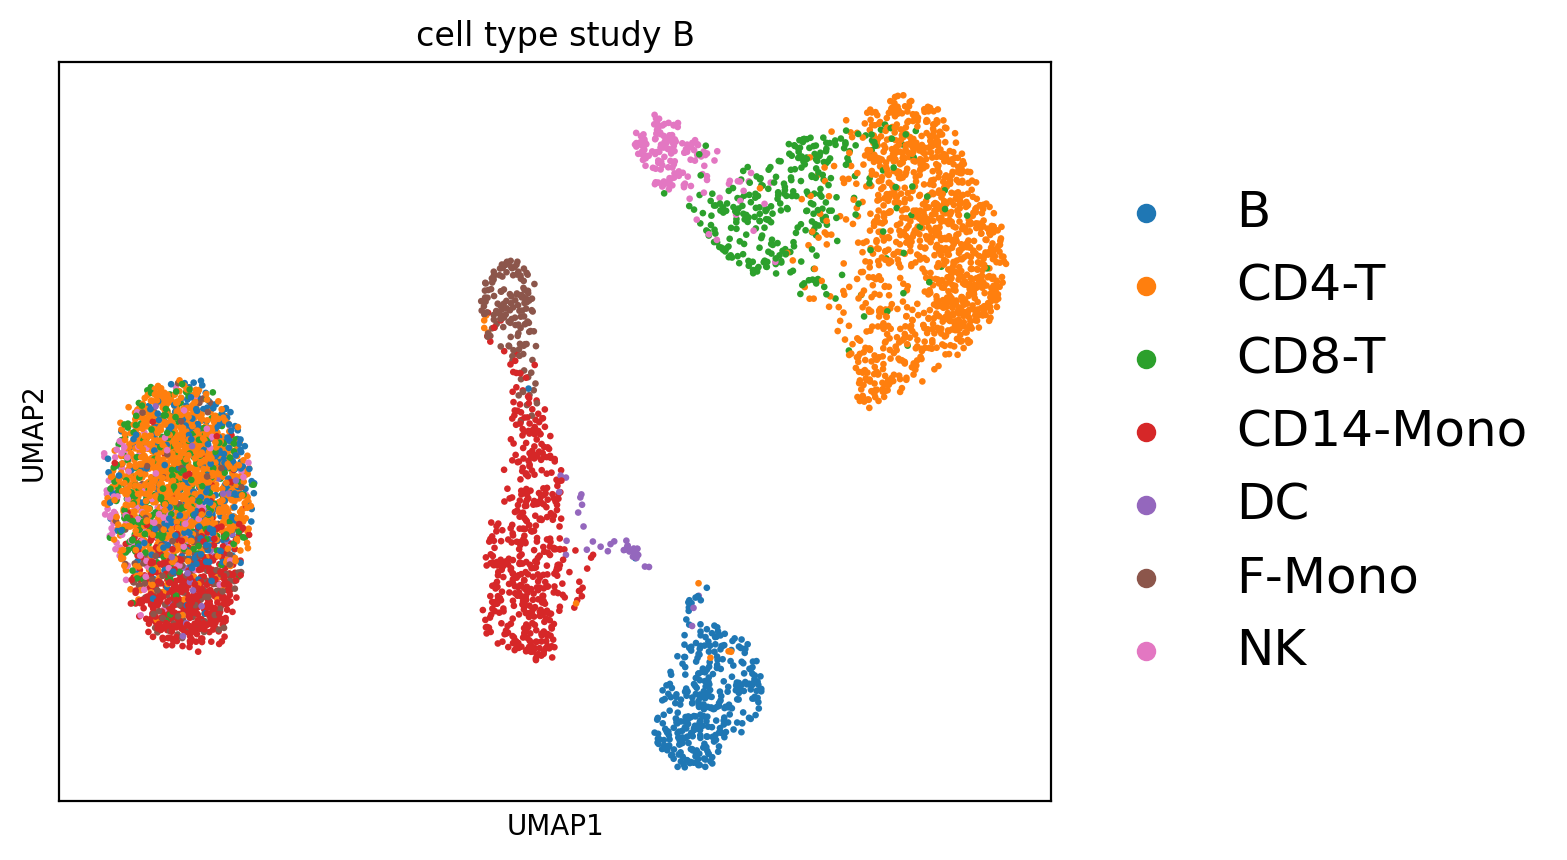

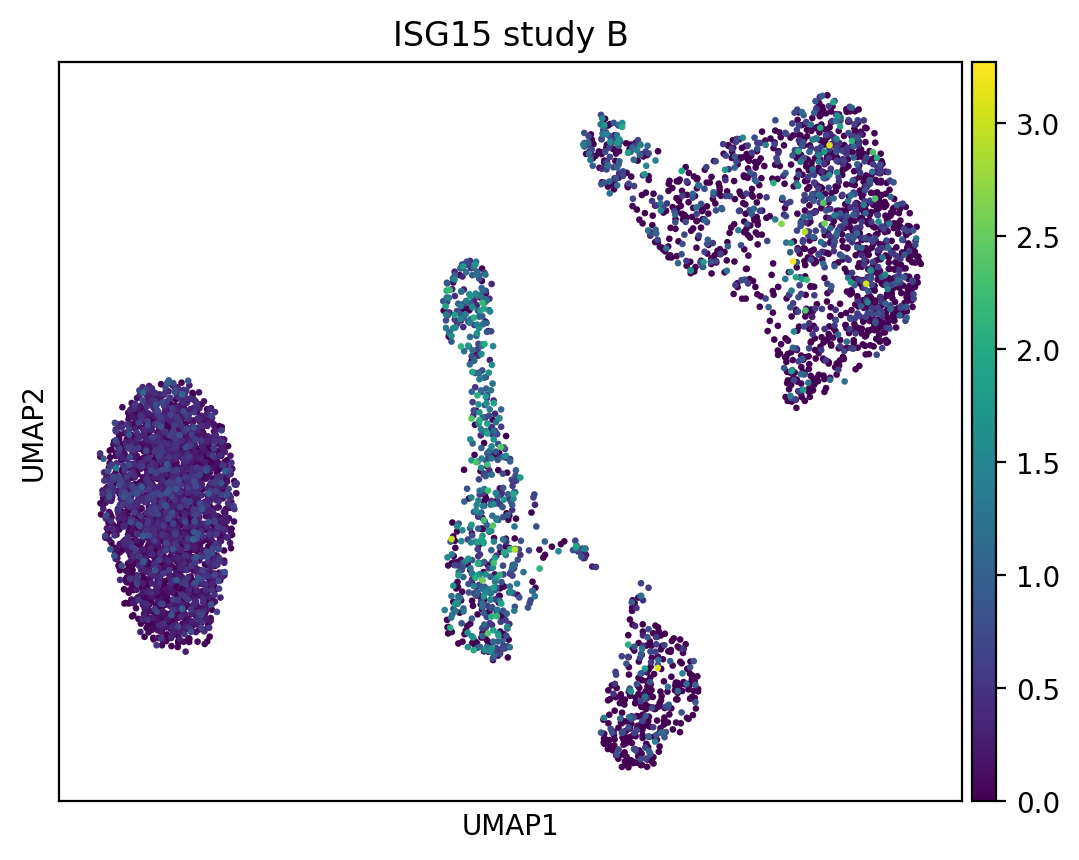

In [14]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
sc.pp.neighbors(all_adata)
sc.tl.umap(all_adata)
sc.pl.umap(all_adata, color = ["cell_type"], title="cell type study B", frameon=True, palette=matplotlib.rcParams["axes.prop_cycle"], legend_fontsize=18, save ="_cross_study_celltype.pdf")
sc.pl.umap(all_adata, color = [ "ISG15"], title="ISG15 study B", frameon=True, palette=matplotlib.rcParams["axes.prop_cycle"], legend_fontsize=14, save ="_cross_study_isg15.pdf")

os.rename(src=os.path.join(path_to_save, "umap_cross_study_celltype.pdf"), 
          dst=os.path.join(path_to_save, "Fig4b_umap_cross_study_celltype.pdf.pdf"))
os.rename(src=os.path.join(path_to_save, "umap_cross_study_isg15.pdf"), 
          dst=os.path.join(path_to_save, "Fig4b_umap_cross_study_isg15.pdf"))

### Figure 4.c

In [15]:
fmono = train[train.obs["cell_type"] == "F-Mono"]
sc.tl.rank_genes_groups(fmono, groupby="condition", method="wilcoxon")
diff_genes = fmono.uns["rank_genes_groups"]["names"]["stimulated"][:5]

/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:669: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


0.6666687641901594


Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


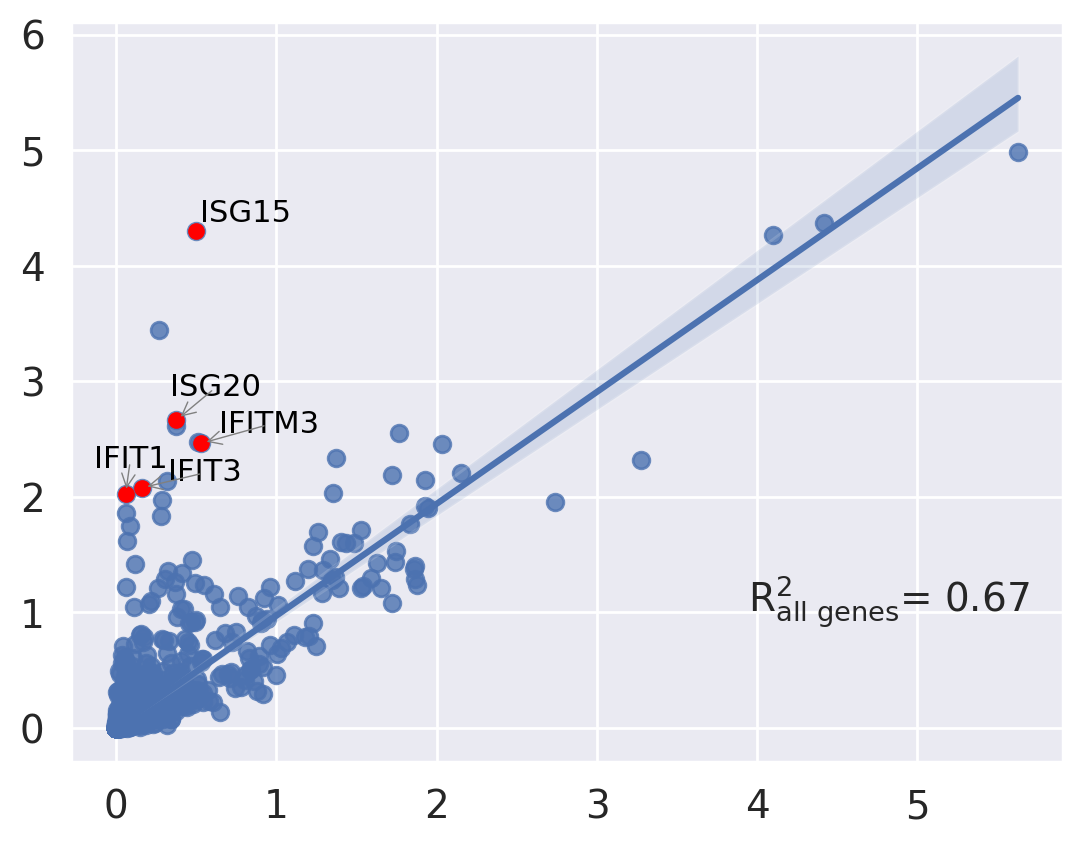

In [16]:
adata = fmono.copy()
matplotlib.rc('ytick', labelsize=15)
matplotlib.rc('xtick', labelsize=15)
scgen.plotting.reg_mean_plot(adata, 
                             condition_key="condition",
                             axis_keys={"x": "control", "y": "stimulated"},
                             labels={"x": "", "y": ""},
                             gene_list=diff_genes[:5],
                             path_to_save=os.path.join(path_to_save, f"Fig4c_left_reg_mean.pdf"),
                             legend=False,
                             title="",
                             show=True,
                             x_coeff=0.3)

In [17]:
adata.obs.groupby(['condition', 'cell_type']).size()

/tmp/ipykernel_49725/3209012599.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby(['condition', 'cell_type']).size()


condition   cell_type
control     F-Mono        987
stimulated  F-Mono       2184
dtype: int64

/tmp/ipykernel_49725/3474884807.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = fmono_stim_train.concatenate(fmono_ctrl_zheng)


0.4966684918374419


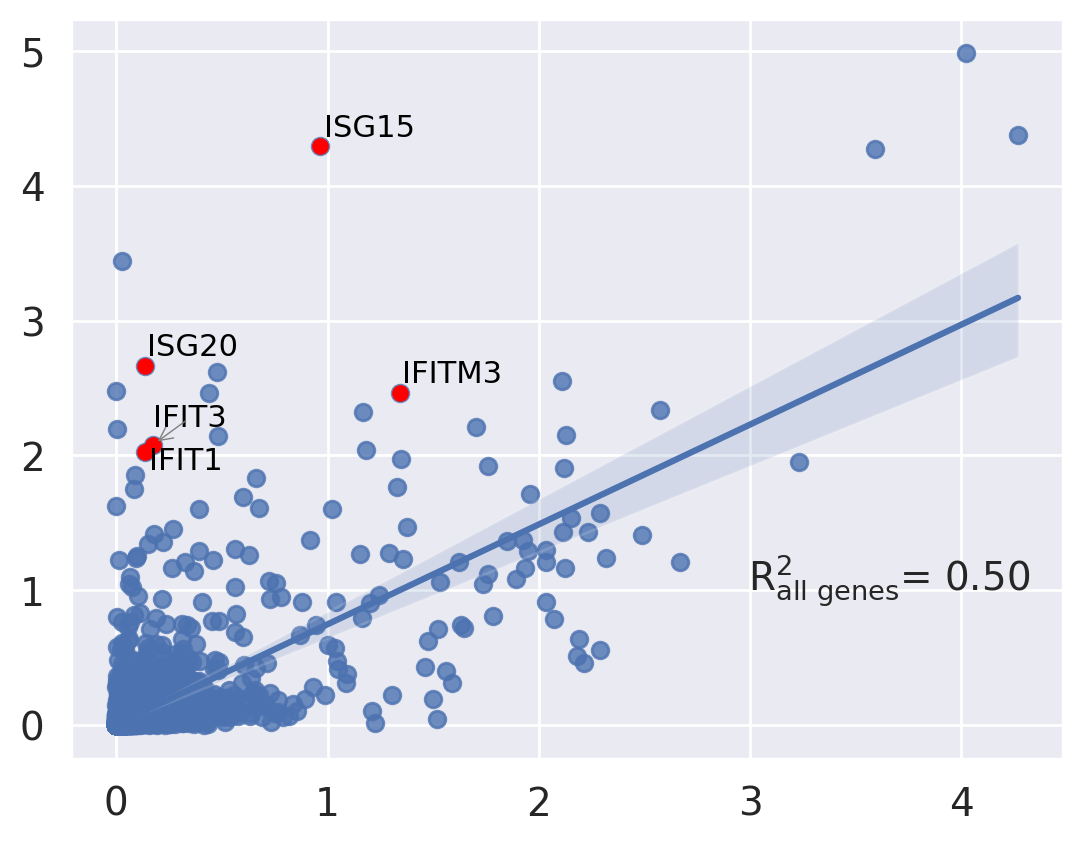

In [18]:
adata = fmono_stim_train.concatenate(fmono_ctrl_zheng)
scgen.plotting.reg_mean_plot(adata, 
                             condition_key="condition",
                             axis_keys={"x": "control", "y": "stimulated"},
                             labels={"x": "", "y": ""},
                             gene_list=diff_genes[:5],
                             path_to_save=os.path.join(path_to_save, f"Fig4c_center_reg_mean.pdf"),
                             legend=False,
                             title="",
                             show=True,
                             x_coeff=0.3)

In [19]:
adata.obs.groupby(['condition', 'cell_type']).size()

/tmp/ipykernel_49725/3209012599.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby(['condition', 'cell_type']).size()


condition   cell_type        
control     FCGR3A+ Monocytes     150
stimulated  FCGR3A+ Monocytes    2184
dtype: int64

/tmp/ipykernel_49725/137578858.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = fmono_pred.concatenate(fmono_ctrl_zheng)


0.00018243325600789175


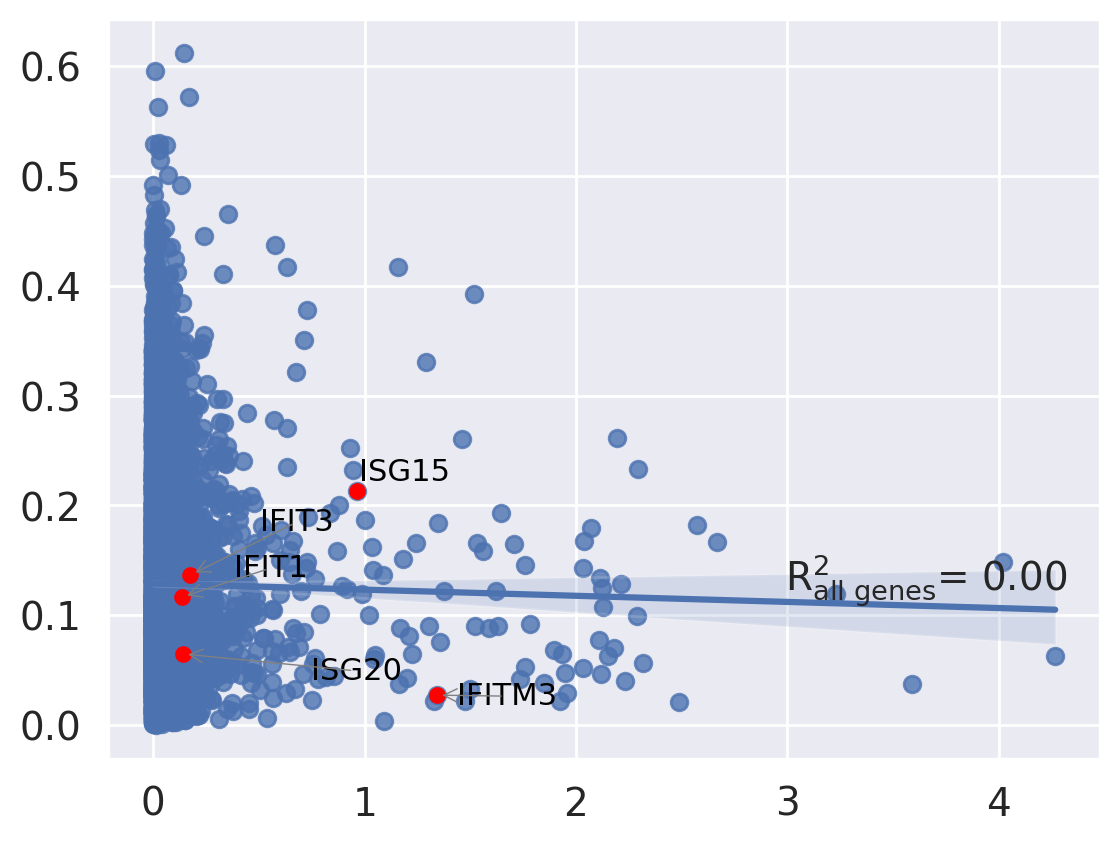

In [20]:
adata = fmono_pred.concatenate(fmono_ctrl_zheng)
scgen.plotting.reg_mean_plot(adata, 
                             condition_key="condition",
                             axis_keys={"x": "control", "y": "pred"},
                             labels={"x": "", "y": ""},
                             gene_list=diff_genes[:5],
                             path_to_save=os.path.join(path_to_save, f"Fig4c_down_reg_mean.pdf"),
                             legend=False,
                             title="",
                             x_coeff=0.3,
                             show=True)

In [21]:
adata.obs.groupby(['condition', 'cell_type']).size()

condition  cell_type        
control    FCGR3A+ Monocytes    150
pred       F-Mono               150
dtype: int64

### Figure 4.d

In [22]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2., 1.01 * height,
                '%.2f' % float(height),
                ha='center', va='bottom', fontsize=14)

In [23]:
def grouped_barplot(df, cat, subcat, val, err, filename, put_label=False, legend=False, offset=0.375):
    plt.close("all")
#     import matplotlib
    matplotlib.rc('ytick', labelsize=25)
    matplotlib.rc('xtick', labelsize=30)
    u = df[cat].unique()
    x_pos = np.arange(0, 2*len(u), 2)
    subx = df[subcat].unique()
    plt.figure(figsize=(12, 7))
#     g = sns.catplot(x=cat, y=val, hue=subcat, data=df, kind='bar', palette="muted", height=6, legend=False)
#     g.despine(left=True)
#     plt.yticks(np.arange(0, 1.2, 0.2))
#     g.set_xticklabels(rotation=90)
#     g.set_xlabels("")
    for i, gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        b = plt.bar(x_pos + i/1.25, dfg[val].values, capsize=10, alpha=0.95, label=f"{gr}", yerr=dfg[err].values)
        a=np.random.normal(dfg[val].values, dfg[err].values, (50, len(u)))
#         print(a.shape)
#         dfc=pd.DataFrame({'x': x_pos + i/1.25, 'y': a[0]})
        plt.plot(x_pos + i/1.25, a.T, '.', color='black', alpha=0.5)
        if put_label:
            autolabel(b)
    
    plt.ylabel(r"$\mathrm{R^2}$", fontsize=25)
    plt.xticks(x_pos+offset, u, rotation=90)
    plt.yticks(np.arange(0, 1.2, .2))
    if legend:
        plt.legend(bbox_to_anchor=(1.05,0.5), loc="center left", borderaxespad=0, prop={'size': 18})
    plt.tight_layout()
    plt.savefig(os.path.join(path_to_save, filename), dpi=300)
    plt.show()

In [24]:
def calc_R2_mean_var(adata, cell_types, conditions):
    r2_means, r2_vars = [], []
    for cell_type in cell_types:
        cell_adata = adata[adata.obs["cell_type"] == cell_type]
        print(cell_type, cell_adata.shape)
        r2_mean, r2_var = calc_R2(cell_adata, conditions=conditions)
        r2_means.append(r2_mean)
        r2_vars.append(r2_var)
    return r2_means, r2_vars
def calc_R2(adata, conditions=None):
    r_values = np.zeros((1, 100))
    ctrl = adata[adata.obs["condition"] == conditions["ctrl"]]
    stim = adata[adata.obs["condition"] == conditions["stim"]]
    for i in range(100):
        ctrl_idx = np.random.choice(range(0, ctrl.shape[0]), int(0.8 * ctrl.shape[0]))
        stim_idx = np.random.choice(range(0, stim.shape[0]), int(0.8 * stim.shape[0]))
        if sparse.issparse(ctrl.X):
            ctrl.X = ctrl.X.toarray()
            stim.X = stim.X.toarray()
        x = np.average(ctrl.X[ctrl_idx], axis=0)
        y = np.average(stim.X[stim_idx], axis=0)
        m, b, r_value, p_value, std_err = stats.linregress(x, y)
        r_values[0, i] = r_value ** 2
    return r_values.mean(), r_values.std()

In [25]:
cell_types_colnames = ["B", "CD14-Mono", "CD4-T", "CD8-T", "DC", "F-Mono", "NK"]
cell_types = zheng.obs["cell_type"].unique().tolist()
cell_types

['CD4-T', 'B', 'CD14-Mono', 'NK', 'CD8-T', 'F-Mono', 'DC']

In [26]:
train_stim = train[train.obs["condition"] == "stimulated"]
pred_data = all_adata[(all_adata.obs["condition"] == "pred")]

study_adata = train_stim.concatenate(zheng)
pred_adata = zheng.concatenate(pred_data)


study_adata.obs["cell_type"].unique().tolist()

/tmp/ipykernel_49725/3767166730.py:4: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  study_adata = train_stim.concatenate(zheng)
/tmp/ipykernel_49725/3767166730.py:5: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  pred_adata = zheng.concatenate(pred_data)


['NK', 'DC', 'CD4-T', 'B', 'F-Mono', 'CD14-Mono', 'CD8-T']

In [27]:
study_adata.obs.groupby(['condition', 'cell_type']).size()

/tmp/ipykernel_49725/2131414664.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  study_adata.obs.groupby(['condition', 'cell_type']).size()


condition   cell_type
control     CD4-T        1144
            CD14-Mono     480
            B             342
            CD8-T         316
            NK            154
            F-Mono        150
            DC             37
stimulated  CD4-T        2739
            CD14-Mono     545
            B             873
            CD8-T         465
            NK            559
            F-Mono       2184
            DC            407
dtype: int64

In [28]:
pred_adata.obs.groupby(['condition', 'cell_type']).size()

/tmp/ipykernel_49725/283366512.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pred_adata.obs.groupby(['condition', 'cell_type']).size()


condition  cell_type
control    CD4-T        1144
           CD14-Mono     480
           B             342
           CD8-T         316
           NK            154
           F-Mono        150
           DC             37
pred       CD4-T        1144
           CD14-Mono     480
           B             342
           CD8-T         316
           NK            154
           F-Mono        150
           DC             37
dtype: int64

In [29]:
conditions = {"stim": "stimulated", "ctrl": "control"}
study_means, study_vars = calc_R2_mean_var(study_adata, cell_types=cell_types, conditions=conditions)
conditions = {"stim": "pred", "ctrl": "control"}
pred_means, pred_vars = calc_R2_mean_var(pred_adata, cell_types=cell_types, conditions=conditions)

CD4-T (3883, 7000)
B (1215, 7000)
CD14-Mono (1025, 7000)
NK (713, 7000)
CD8-T (781, 7000)
F-Mono (2334, 7000)
DC (444, 7000)
CD4-T (2288, 7000)
B (684, 7000)
CD14-Mono (960, 7000)
NK (308, 7000)
CD8-T (632, 7000)
F-Mono (300, 7000)
DC (74, 7000)


In [30]:
all_means = np.concatenate([study_means, pred_means])
all_vars = np.concatenate([study_vars, pred_vars])
all_types = ["Study A"] * 7 + ["Prediction"] * 7
models = 2 * cell_types
df = pd.DataFrame({"R^2 Means": all_means, "R^2 Stddevs": all_vars, "Type": all_types, "Cell Types": models})
df

,R^2 Means,R^2 Stddevs,Type,Cell Types
0,0.736650,0.002160,Study A,CD4-T
1,0.665890,0.003985,Study A,B
2,0.441679,0.005203,Study A,CD14-Mono
3,0.642307,0.004903,Study A,NK
4,0.700500,0.003663,Study A,CD8-T
5,0.494618,0.003796,Study A,F-Mono
6,0.484620,0.009993,Study A,DC
7,0.000278,0.000032,Prediction,CD4-T
8,0.000232,0.000050,Prediction,B
9,0.000275,0.000043,Prediction,CD14-Mono


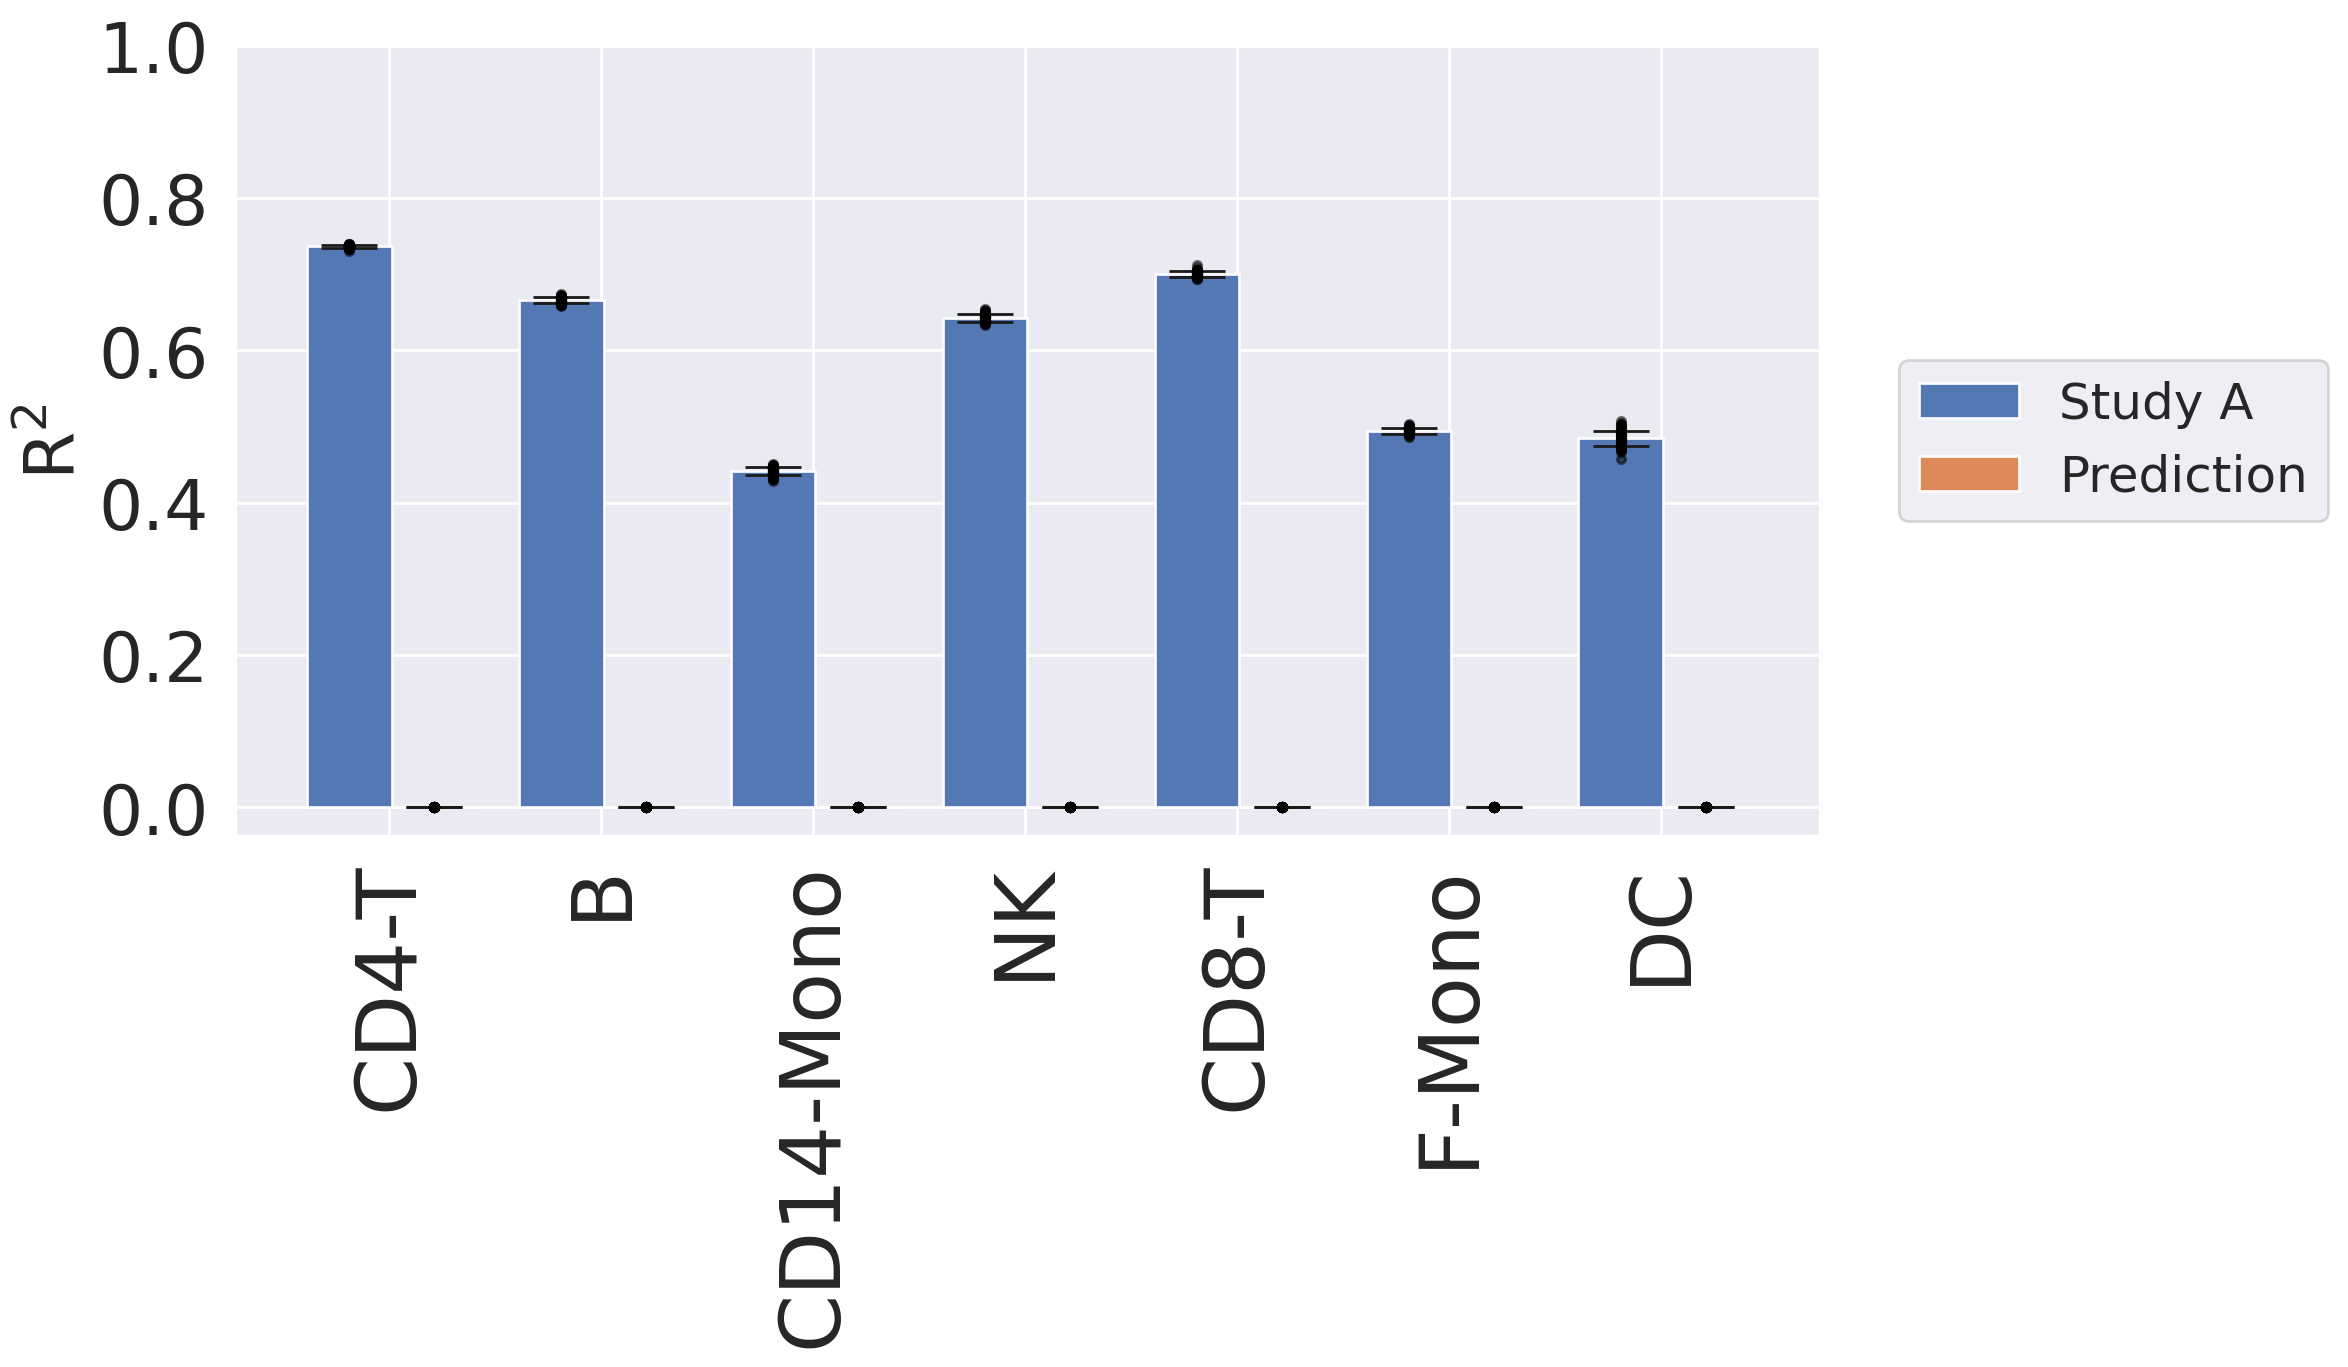

In [31]:
sns.set()
grouped_barplot(df, "Cell Types", "Type", "R^2 Means", "R^2 Stddevs", legend=True, put_label=False, filename="Fig4d_celltypes_barplots.pdf")